In [1]:
# importing libraries
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# Loading the data

train = pd.read_csv('train.csv')

# splitting the data features and labels
Y = train['label'].to_numpy()
X = train.drop('label', axis=1).to_numpy()/255

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((33600, 784), (33600,), (8400, 784), (8400,))

In [3]:
len(X_train)

33600

In [4]:
# converting to torch tensors for train data
X_train = torch.from_numpy(X_train)
y_train = torch.from_numpy(y_train).type(torch.LongTensor)

# converting to torch tensors for test data
X_test = torch.from_numpy(X_test)
y_test = torch.from_numpy(y_test).type(torch.LongTensor)

batch_size = 100
n_iters = 10000
num_epochs = n_iters/(len(X_train)/batch_size)
num_epochs = int(num_epochs)

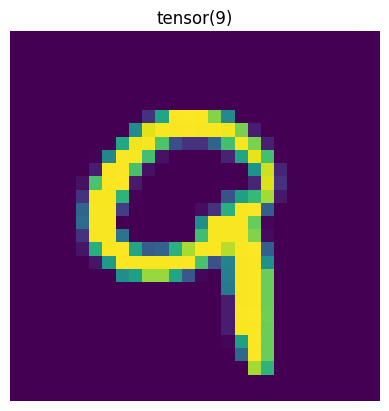

In [5]:
# Pytorch train and test sets
import torch.utils
import torch.utils.data


train = torch.utils.data.TensorDataset(X_train, y_train)
test = torch.utils.data.TensorDataset(X_test, y_test)

# Data loader
train_loader = DataLoader(train, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test, batch_size=batch_size, shuffle=False)

# Visualize one of the images in data set
plt.imshow(X_train[10].reshape(28,28))
plt.axis('off')
plt.title(str(y_train[10]))
plt.show()

In [6]:
# View first two batches
batch_count = 0
for images, labels in train_loader:
    print(f"Batch {batch_count + 1} - Images:")
    print(images)  # Tensor of shape [batch_size, 784]
    print(f"Batch {batch_count + 1} - Labels:")
    print(labels)  # Tensor of shape [batch_size]
    batch_count += 1
    if batch_count == 1:  # Stop after 2 batches
        break


Batch 1 - Images:
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], dtype=torch.float64)
Batch 1 - Labels:
tensor([6, 5, 3, 4, 7, 8, 6, 7, 0, 9, 9, 7, 6, 9, 9, 3, 1, 6, 3, 0, 6, 6, 5, 6,
        0, 6, 9, 5, 8, 0, 5, 0, 4, 0, 3, 1, 3, 7, 1, 3, 3, 7, 0, 7, 3, 3, 1, 7,
        8, 8, 2, 4, 0, 6, 6, 1, 5, 0, 4, 4, 8, 6, 0, 7, 6, 3, 4, 2, 6, 7, 6, 8,
        7, 2, 5, 7, 1, 2, 2, 1, 4, 7, 7, 4, 5, 4, 0, 1, 7, 2, 3, 2, 2, 8, 4, 0,
        4, 1, 8, 1])


In [7]:
# Create Logistic Regression Model

class LogisticRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        # Linear layer
        self.linear = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        out = self.linear(x)
        return out

# Instantiate model class
input_dim = 28*28
output_dim = 10

# Create logistic regression model
model = LogisticRegression(input_dim, output_dim)

# Cross Entropy Loss
error = nn.CrossEntropyLoss()

# SGD optimizer
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [8]:
# Training the Model

# Initialize variables
count = 0
loss_list = []
iteration_list = []

# Loop for epochs
for epoch in range(num_epochs):
    # Loop for batches
    for i, (images, labels) in enumerate(train_loader):
        # Define variables
        train = images.view(-1, 28*28).float()
        labels = labels

        # Clear gradients
        optimizer.zero_grad()

        # Forward propagation
        outputs = model(train)

        # Calculate softmax and cross entropy loss
        loss = error(outputs, labels)

        # Calculate gradients
        loss.backward()

        # Update parameters
        optimizer.step()

        count += 1

        # Prediction
        if count % 50 == 0:
            # Calculate accuracy
            correct = 0
            total = 0
            # Predict test dataset
            for images, labels in test_loader:
                test = images.view(-1, 28*28).float()

                # Foreward propagation
                outputs = model(test)

                # Get prediction from the maximum value
                predicted = torch.max(outputs.data,1)[1]

                # Total number of labels
                total += len(labels)

                # Total correct predictions
                correct += (predicted == labels).sum()

            accuracy = 100 * correct/float(total)

            # Store loss and iteration
            loss_list.append(loss.item())
            iteration_list.append(count)
        
        if count % 500 == 0:
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {}'.format(count, loss.item(), accuracy))

Iteration: 500  Loss: 1.8521111011505127  Accuracy: 67.35713958740234
Iteration: 1000  Loss: 1.6102280616760254  Accuracy: 75.39286041259766
Iteration: 1500  Loss: 1.3136714696884155  Accuracy: 78.08333587646484
Iteration: 2000  Loss: 1.2148569822311401  Accuracy: 79.58333587646484
Iteration: 2500  Loss: 1.0543162822723389  Accuracy: 80.83333587646484
Iteration: 3000  Loss: 0.9440903663635254  Accuracy: 81.85713958740234
Iteration: 3500  Loss: 0.9049928188323975  Accuracy: 82.47618865966797
Iteration: 4000  Loss: 0.7574388384819031  Accuracy: 83.08333587646484
Iteration: 4500  Loss: 0.9673143625259399  Accuracy: 83.63095092773438
Iteration: 5000  Loss: 0.8117278814315796  Accuracy: 83.92857360839844
Iteration: 5500  Loss: 0.7522569298744202  Accuracy: 84.19047546386719
Iteration: 6000  Loss: 0.8697457909584045  Accuracy: 84.5
Iteration: 6500  Loss: 0.6661926507949829  Accuracy: 84.66666412353516
Iteration: 7000  Loss: 0.7188733816146851  Accuracy: 84.92857360839844
Iteration: 7500  Los

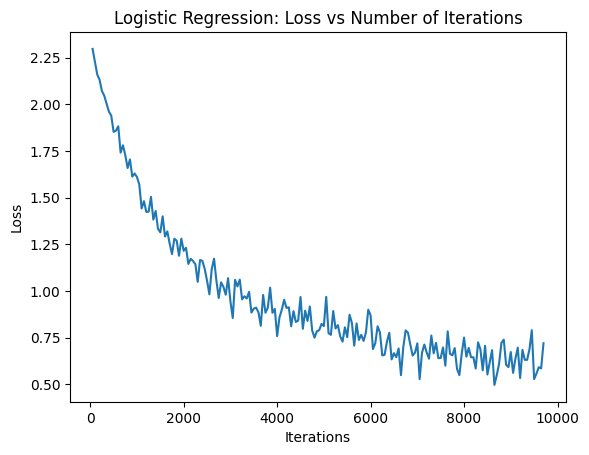

In [9]:
plt.plot(iteration_list, loss_list)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Logistic Regression: Loss vs Number of Iterations")
plt.show()

In [10]:
# Create ANN Model
class ANNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()

        # Linear function 1: 784 --> 150
        self.fc1 = nn.Linear(input_dim, hidden_dim)

        # Non-linearity 1
        self.relu1 = nn.ReLU()

        # Linear function 2: 150 --> 150
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)

        # Non-linearity 2
        self.tanh2 = nn.Tanh()

        # Linear function # 3: 150 --> 150
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)

        # Non-linearity 3
        self.elu3 = nn.ELU()

        # Linear function 4: 150 --> 10
        self.fc4 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Linear function 1
        out = self.fc1(x)
        # Non linearity 1
        out = self.relu1(out)
        
        # Linear function 2
        out = self.fc2(out)
        # Non linearity 2
        out = self.tanh2(out)
        
        # Linear function 3
        out = self.fc3(out)
        # Non linearity 3
        out = self.elu3(out)

        # Linear function 4 (readout)
        out = self.fc4(out)
        return out
# instantiate ANN 
input_dim = 28*28
hidden_dim = 150 # Hidden layer dim is one of the hyperparameters and it should be chosen and tuned. For now i only choose 150 and see how it performs, there is no reason why it should be 150

output_dim = 10

# Create ANN
model = ANNModel(input_dim, hidden_dim, output_dim)

# Cross Entropy Loss
error = nn.CrossEntropyLoss()

# SGD optimizer

learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [11]:
# ANN model training

count = 0
loss_list = []
iteration_list = []
accuracy_list = []

# Loop for epochs
for epoch in range(num_epochs):
    for i,(images, labels) in enumerate(train_loader):

        train = images.view(-1, 28*28).float()
        labels = labels

        # Clear gradients
        optimizer.zero_grad()

        # Forward propagation
        outputs = model(train)

        # Calculate softmax and cross entropy loss
        loss = error(outputs, labels)

        # Calculate gradients
        loss.backward()

        # Update parameters
        optimizer.step()

        count += 1

        if count % 50 == 0:
            # Calculate accuracy
            correct = 0
            total = 0

            # Predict test dataset
            for images, labels in test_loader:
                test = images.view(-1,28*28).float()

                # Forward propagation
                outputs = model(test)

                # Get prediction from the maximum value
                predicted = torch.max(outputs.data, 1)[1]

                # Total number of labels
                total += len(labels)

                # Total correct predictions
                correct += (predicted ==labels).sum()

            accuracy = 100* correct/float(total)

            # Store loss and iteration
            loss_list.append(loss.item())
            iteration_list.append(count)
            accuracy_list.append(accuracy)

        if count % 500 ==0:
            # Print Loss
            print("Iteration:{} Loss{} Accuracy{}%".format(count,loss.item(), accuracy))

Iteration:500 Loss0.782335638999939 Accuracy79.03571319580078%
Iteration:1000 Loss0.43435123562812805 Accuracy88.05952453613281%
Iteration:1500 Loss0.2404148131608963 Accuracy89.73809814453125%
Iteration:2000 Loss0.3141394257545471 Accuracy90.70237731933594%
Iteration:2500 Loss0.31944629549980164 Accuracy91.9047622680664%
Iteration:3000 Loss0.13273485004901886 Accuracy92.54762268066406%
Iteration:3500 Loss0.24629510939121246 Accuracy93.42857360839844%
Iteration:4000 Loss0.0661989226937294 Accuracy93.80952453613281%
Iteration:4500 Loss0.2981020212173462 Accuracy94.20237731933594%
Iteration:5000 Loss0.09575145691633224 Accuracy94.64286041259766%
Iteration:5500 Loss0.2041810005903244 Accuracy94.95237731933594%
Iteration:6000 Loss0.19328780472278595 Accuracy95.14286041259766%
Iteration:6500 Loss0.09203100204467773 Accuracy95.64286041259766%
Iteration:7000 Loss0.11775661259889603 Accuracy95.98809814453125%
Iteration:7500 Loss0.12660425901412964 Accuracy95.83333587646484%
Iteration:8000 Loss

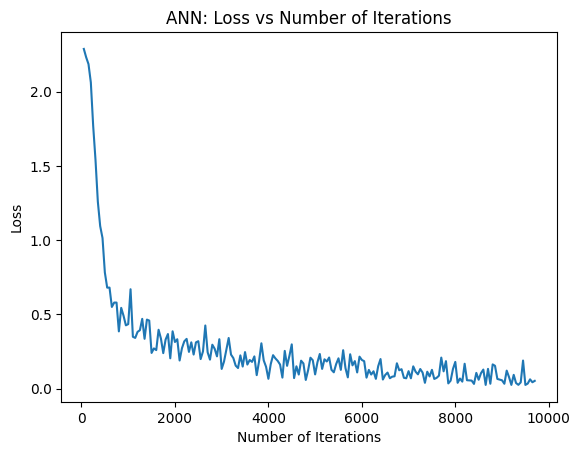

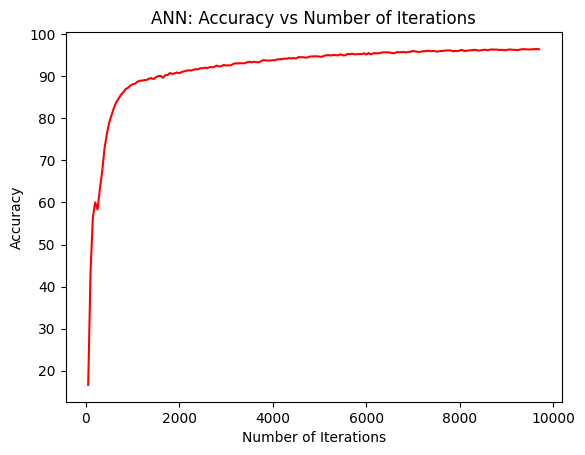

In [12]:
# Visualization loss
plt.plot(iteration_list, loss_list)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.title("ANN: Loss vs Number of Iterations")
plt.show()

# Visualization accuracy
plt.plot(iteration_list, accuracy_list, c="red")
plt.xlabel("Number of Iterations")
plt.ylabel("Accuracy")
plt.title("ANN: Accuracy vs Number of Iterations")
plt.show()

In [13]:
# for i, (images, labels) in enumerate(train_loader):
#     print(f"Batch {i}:")
#     print(images.shape)  # (100, 784) for batch_size=100
#     print(labels.shape)  # (100)
#     if i == 1:  # Stop after 2 batches
#         break


In [14]:
# Create CNN Model

import torch.utils.data.dataloader


class CNNModel(nn.Module):
    def __init__(self):
        super().__init__()

        # Convolution 1
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=0)
        self.relu1 = nn.ReLU()

        # Max pool 1
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)

        # Convolution 2
        self.cnn2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=0)
        self.relu2 = nn.ReLU()

        # Max pool 2
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)

        # Fully connected 1 (readout)
        self.fc1 = nn.Linear(in_features=32 * 4 * 4, out_features=10)
    
    def forward(self, x):
        # Convolution 1
        out = self.cnn1(x)
        out = self.relu1(out)

        # Max pool 1
        out = self.maxpool1(out)

        # Convolution 2
        out = self.cnn2(out)
        out = self.relu2(out)

        # Max pool 2
        out = self.maxpool2(out)

        # flatten
        out = out.view(out.size(0), -1)

        # Linear function (readout)
        out = self.fc1(out)

        return out
# batch_size, epochs and iteration

batch_size = 100
n_iters = 2500
num_epochs = n_iters / (len(X_train) / batch_size)
num_epochs = int(num_epochs)

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(X_train, y_train)
test = torch.utils.data.TensorDataset(X_train, y_train)

# Data loader
train_loader = torch.utils.data.DataLoader(train, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(test, batch_size=batch_size, shuffle=False)

# Create CNN
model = CNNModel()

# Cross Entropy Loss
error = nn.CrossEntropyLoss()

# SGD optimizer
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [15]:
# CNN model training
count = 0
loss_list = []
iteration_list = []
accuracy_list = []

# Loop for epochs
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        train = images.view(100,1,28,28).float()
        labels = labels

        # Clear gradients
        optimizer.zero_grad()

        # Forward propagation
        outputs = model(train)

        # Calculate softmax and cross entropy loss
        loss = error(outputs, labels)

        # Calculate gradients
        loss.backward()

        # Update parameters
        optimizer.step()

        count += 1

        # Prediction
        if count % 50 ==0:
            # Calculate accuracy
            correct = 0
            total = 0

            # Iter``
            for images, labels in test_loader:
                test = images.view(100,1,28,28).float()

                # Forward propagation
                outputs = model(test)

                # Get prediction from the maximum value
                predicted = torch.max(outputs.data,1)[1]

                # Total number of labels
                total += len(labels)

                # Total correct predictions
                correct += (predicted == labels).sum()

            # Accuracy
            accuracy = 100 * correct/float(total)

            # Store loss, iteration and accuracy
            loss_list.append(loss.item())
            iteration_list.append(count)
            accuracy_list.append(accuracy)

        if count % 500 == 0:
            print("Iteration:{} Loss{} Accuracy{}%".format(count, loss.item(), accuracy))

Iteration:500 Loss0.13904109597206116 Accuracy96.7827377319336%
Iteration:1000 Loss0.043105658143758774 Accuracy98.14583587646484%
Iteration:1500 Loss0.04817917197942734 Accuracy98.00595092773438%
Iteration:2000 Loss0.0223203357309103 Accuracy98.80357360839844%


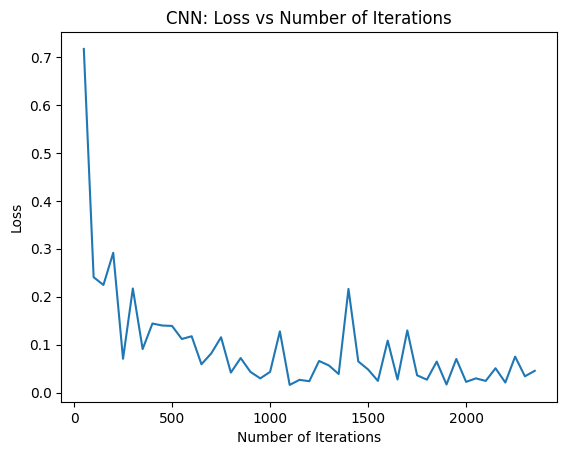

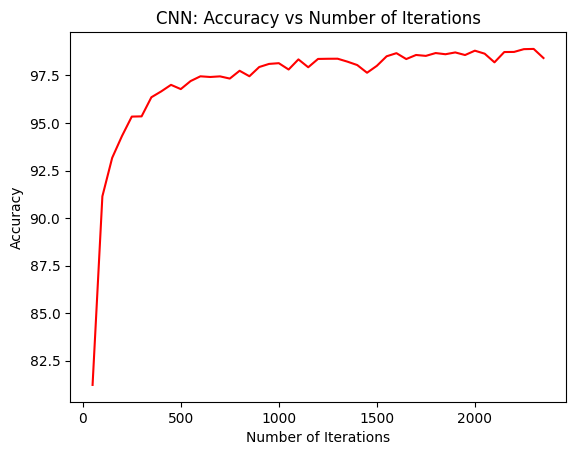

In [16]:
# visualization of loss
plt.plot(iteration_list, loss_list)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.title("CNN: Loss vs Number of Iterations")
plt.show()

# visualization of accuracy
plt.plot(iteration_list, accuracy_list, c="red")
plt.xlabel("Number of Iterations")
plt.ylabel("Accuracy")
plt.title("CNN: Accuracy vs Number of Iterations")
plt.show()